1. What is Simple Linear Regression?
- It is a statistical method to model the relationship between one independent variable (X) and one dependent variable (Y).
- The relationship is expressed using a linear equation: Y = β₀ + β₁X + ε.
- It helps predict Y based on X and estimates how much Y changes for a unit change in X.
- The goal is to minimize the sum of squared errors between actual and predicted Y values.

2. What are the key assumptions of Simple Linear Regression?
- Linearity: The relationship between X and Y is linear.
- Independence: Observations are independent of each other.
- Homoscedasticity: The variance of residuals is constant across all X values.
- Normality: Residuals are normally distributed.

3. What is heteroscedasticity, and why is it important to address in regression models?
- Heteroscedasticity occurs when residuals (errors) have non-constant variance across X values.
- It violates regression assumptions and leads to inefficient and biased estimates.
- It affects the reliability of hypothesis tests and confidence intervals.
- Can be addressed using log transformation, robust standard errors, or weighted least squares.

4. What is Multiple Linear Regression?
- It models the relationship between one dependent variable (Y) and multiple independent variables (X₁, X₂, …, Xₙ).
- The equation is: Y = β₀ + β₁X₁ + β₂X₂ + … + βₙXₙ + ε. It helps understand how several factors together affect Y.
- Requires checking for multicollinearity among predictors.

5. What is polynomial regression, and how does it differ from linear regression?
- Polynomial regression models a non-linear relationship by adding powers of X (e.g., X², X³).
- The equation: Y = β₀ + β₁X + β₂X² + … + ε.
- Linear regression fits a straight line, while polynomial regression fits a curved line.
- It can capture more complex patterns but risks overfitting.



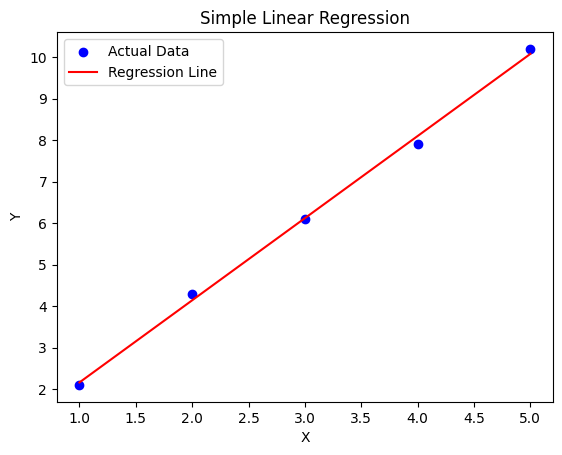

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


In [1]:
# 6. Implement a Python program to fit a Simple Linear Regression model to the following sample data: ● X = [1, 2, 3, 4, 5] ● Y = [2.1, 4.3, 6.1, 7.9, 10.2] Plot the regression line over the data points. (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


In [2]:
# 7. Fit a Multiple Linear Regression model on this sample data: ● Area = [1200, 1500, 1800, 2000] ● Rooms = [2, 3, 3, 4] ● Price = [250000, 300000, 320000, 370000] Check for multicollinearity using VIF and report the results. (Include your Python code and output in the code box below.)

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
Y = data['Price']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Fri, 31 Oct 2025   Prob (F-statistic):             0.0377
Time:                        07:00:04   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


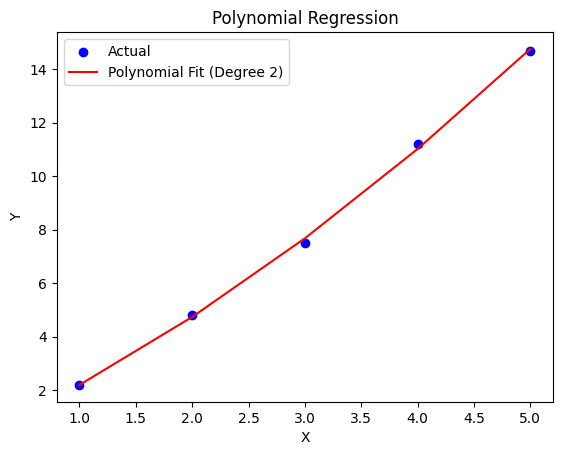

In [3]:
# 8. Implement polynomial regression on the following data: ● X = [1, 2, 3, 4, 5] 3 ● Y = [2.2, 4.8, 7.5, 11.2, 14.7] Fit a 2nd-degree polynomial and plot the resulting curve. (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


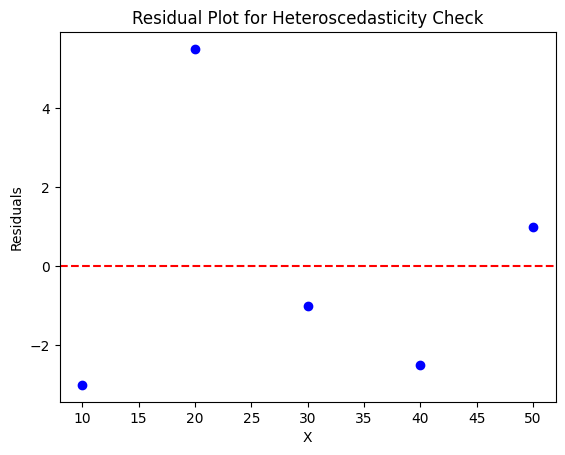

In [4]:
# 9. Create a residuals plot for a regression model trained on this data: ● X = [10, 20, 30, 40, 50] ● Y = [15, 35, 40, 50, 65] Assess heteroscedasticity by examining the spread of residuals. (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1,1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroscedasticity Check')
plt.show()


10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
- For Heteroscedasticity:
    - Apply log or square-root transformations on Y or X variables.
    - Use robust standard errors or weighted least squares.
- For Multicollinearity:
    - Remove or combine highly correlated variables.
    - Use Principal Component Analysis (PCA) or regularization (Ridge/Lasso).
- Model Validation:
    - Refit the model and check assumptions again.
    - Use cross-validation to ensure stability.
- Outcome:
    - A more stable, interpretable, and statistically reliable regression model.